In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
y = y.reshape(-1,1)
X.shape, y.shape

((70000, 784), (70000, 1))

array(['3'], dtype=object)

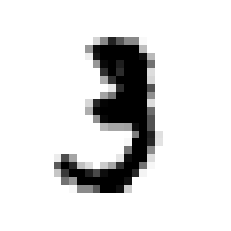

In [4]:
some_digit = X[10]
plt.imshow(some_digit.reshape(28,28), cmap=mpl.cm.binary, interpolation="nearest") # check meaning of interpolatation
plt.axis("off")
y[10]

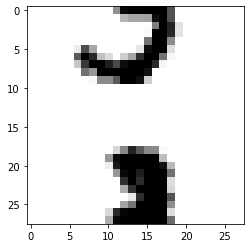

In [5]:
some_digit1 = some_digit[:392].reshape(-1,1)
some_digit2 = some_digit[392:].reshape(-1,1)
# some_digit1.shape, some_digit2.shape
flipped_imaage = np.concatenate([some_digit2, some_digit1])
flipped_imaage.shape
plt.imshow(flipped_imaage.reshape(28,28), cmap=mpl.cm.binary, interpolation="nearest") # check meaning of interpolatation


In [6]:
def plot_digit(data):
    data = data.reshape(28,28)
    plt.imshow(data, cmap=mpl.cm.binary, interpolation="nearest")

In [7]:
plt.figure(figsize=(9,9))
example_images = X[:100]
# plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()
len(example_images)
example_images

<Figure size 648x648 with 0 Axes>

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
a = np.array([[1, 2], [3, 4]])
a, a.transpose(0,1), a.transpose(1,0)
# X[0].shape

(array([[1, 2],
        [3, 4]]),
 array([[1, 2],
        [3, 4]]),
 array([[1, 3],
        [2, 4]]))

In [9]:
a = np.array([[1,2,3,4],[5,6,7,8]])
b = np.array([[10,20,30,40],[50,60,70,80]])
images = np.concatenate([a, b], axis=0)

# images, images.reshape()
test = images.reshape(2,2,2,2)
test, test.transpose(0,2,1,3),test.transpose(0,2,1,3).shape, test.reshape(4,4)


(array([[[[ 1,  2],
          [ 3,  4]],
 
         [[ 5,  6],
          [ 7,  8]]],
 
 
        [[[10, 20],
          [30, 40]],
 
         [[50, 60],
          [70, 80]]]]),
 array([[[[ 1,  2],
          [ 5,  6]],
 
         [[ 3,  4],
          [ 7,  8]]],
 
 
        [[[10, 20],
          [50, 60]],
 
         [[30, 40],
          [70, 80]]]]),
 (2, 2, 2, 2),
 array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [10, 20, 30, 40],
        [50, 60, 70, 80]]))

10
original (100, 784)
padding_instances (100, 784) 2
image_grid 4 (10, 10, 28, 28)
big image  (10, 28, 10, 28) 4
nrows :  10  size :  28  images_per_row :  10
big image  (280, 280) 2


(-0.5, 279.5, 279.5, -0.5)

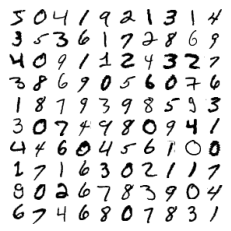

In [10]:
size = 28
example_images = X[:100]
instances = example_images
images_per_row = 10
images_per_row = min(len(instances), images_per_row)

# This is equivalent to n_rows = ceil(len(instances) / images_per_row):

n_rows = (len(instances) - 1) // images_per_row + 1
print(n_rows)

# Append empty images to fill the end of the grid, if needed:

n_empty = n_rows * images_per_row - len(instances)
# print(n_empty)
# padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
padded_instances = instances

# Reshape the array so it's organized as a grid containing 28×28 images:
print("original", example_images.shape)
image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
print("padding_instances",padded_instances.shape, padded_instances.ndim)
print("image_grid",image_grid.ndim, image_grid.shape)

# Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
# and axes 1 and 3 (horizontal axes). We first need to move the axes that we
# want to combine next to each other, using transpose(), and only then we
# can reshape:

big_image = image_grid.transpose(0, 2, 1, 3)
big_image1 = image_grid.transpose(0, 3, 1, 2)

print("big image ",big_image.shape, big_image.ndim)
print("nrows : ", n_rows, " size : ", size, " images_per_row : ", images_per_row)
big_image = big_image.reshape(n_rows * size,images_per_row * size)
big_image1 = big_image1.reshape(n_rows * size,images_per_row * size)

print("big image ",big_image.shape, big_image.ndim)

# Now that we have a big image, we just need to show it:
plt.imshow(big_image, cmap = mpl.cm.binary)

plt.axis("off")

(-0.5, 279.5, 279.5, -0.5)

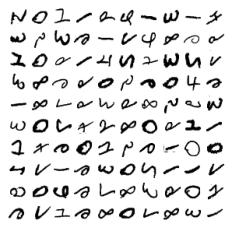

In [11]:
plt.imshow(big_image1, cmap = mpl.cm.binary)
plt.axis("off")

In [21]:
# training a binary classifier
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
X_train.shape, y_train.shape
# y_train.shape, y_test.shape

((60000, 784), (60000, 1))

In [24]:
a = np.array([1,2,3])
a.ravel().shape, a.shape

((3,), (3,))

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5.ravel())
y_train_5 = y_train_5.ravel()

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [29]:
# or you can do 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

## confusion matrix

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [55]:
y_predict = sgd_clf.predict(X_train)
y_train_pred.shape
y_train_pred, y_predict, y_train_5

(array([ True, False, False, ...,  True, False, False]),
 array([ True, False, False, ...,  True, False, False]),
 array([ True, False, False, ...,  True, False, False]))

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# Each row in a confusion matrix represents an actual class, while each column represents
# a predicted class. The first row of this matrix considers non-5 images (the negative
# class): 53,057 of them were correctly classified as non-5s (they are called true
# negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
# The second row considers the images of 5s (the positive class): 1,325 were wrongly
# classified as non-5s (false negatives), while the remaining 4,096 were correctly classified
# as 5s (true positives).

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [36]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and recall

In [38]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [39]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [41]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [42]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [43]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [44]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

In [ ]:
# the above all implies that each one of them can be derived from the confusion matrix

In [56]:
# To understand this tradeoff, let’s look at how the SGDClassifier makes its classification
# decisions. For each instance, it computes a score based on a decision function,
# and if that score is greater than a threshold, it assigns the instance to the positive
# class, or else it assigns it to the negative class.

In [57]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-5711.47789687])

In [58]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [59]:
y_some_digit_pred

array([False])

In [60]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [62]:
# Now how do you decide which threshold to use? For this you will first need to get the
# scores of all instances in the training set using the cross_val_predict() function
# again, but this time specifying that you want it to return decision scores instead of
# predictions:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [70]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions.shape

(59967,)

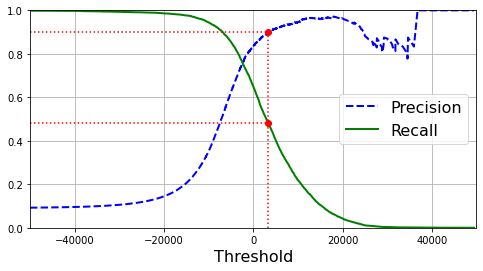

In [65]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
# save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()